<a href="https://colab.research.google.com/github/AUT-Student/SML-HW2/blob/main/SML_HW2_Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><b>In the name of God</b></center>

<b>Course</b>: Statistical Machine Learning
<br>
<b>Description:</b> HomeWork 2 | Question 5
<br>
<b>Developer</b>: Alireza Mazochi (400131075)

In [15]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Dataset

In [2]:
np.random.seed(0)

In [3]:
dataset = np.random.normal(loc=5, scale=1, size=100)

In [4]:
dataset

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ,
       5.14404357, 6.45427351, 5.76103773, 5.12167502, 5.44386323,
       5.33367433, 6.49407907, 4.79484174, 5.3130677 , 4.14590426,
       2.44701018, 5.6536186 , 5.8644362 , 4.25783498, 7.26975462,
       3.54563433, 5.04575852, 4.81281615, 6.53277921, 6.46935877,
       5.15494743, 5.37816252, 4.11221425, 3.01920353, 4.65208785,
       5.15634897, 6.23029068, 6.20237985, 4.61267318, 4.69769725,
       3.95144703, 3.57998206, 3.29372981, 6.9507754 , 4.49034782,
       4.5619257 , 3.74720464, 5.77749036, 3.38610215, 4.78725972,
       4.10453344, 5.3869025 , 4.48919486, 3.81936782, 4.97181777,
       5.42833187, 5.06651722, 5.3024719 , 4.36567791, 4.63725883,
       4.32753955, 4.64044684, 4.18685372, 3.2737174 , 5.17742614,
       4.59821906, 3.36980165, 5.46278226, 4.09270164, 5.0519454 ,
       5.72909056, 5.12898291, 6.13940068, 3.76517418, 5.40234

# Bootstrap

In [5]:
def bootstrap(samples, g, B=1000):
  T_stars = []
  n = len(samples)
  for _ in range(B):
    bootstrap_samples = np.array(random.choices(samples, k=n))
    T_star = g(bootstrap_samples)
    T_stars.append(T_star)

  T_stars = np.array(T_stars)
  bootstrap_variance = T_stars.var()

  return bootstrap_variance

In [10]:
g = lambda samples: np.exp(samples.mean())

In [11]:
bootstrap_se = bootstrap(dataset, g)**0.5
g_estimation = g(dataset)

In [12]:
print(f"Estimation = {g_estimation}, se = {bootstrap_se}")

Estimation = 157.56026429637294, se = 16.660972206808225


In [13]:
z = 1.88 # alpha/2 = 0.03

In [14]:
print(g_estimation - z*bootstrap_se, g_estimation + z*bootstrap_se) 

126.23763654757347 188.8828920451724


# Bootstrap Histogram

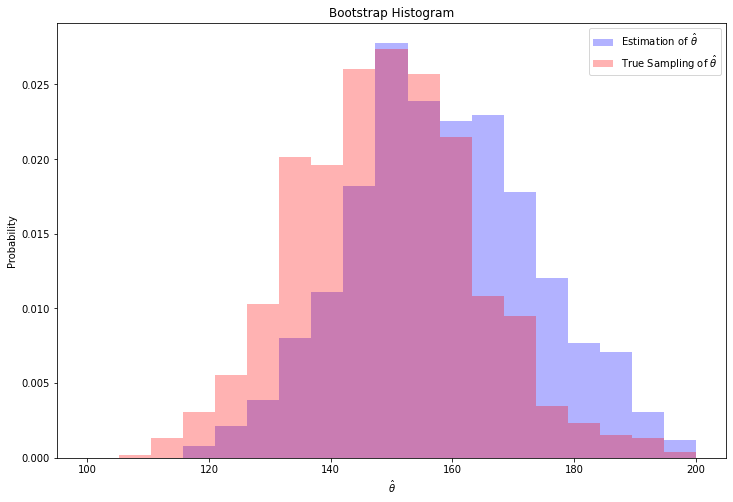

In [46]:
samples = dataset
B=1000

T_stars = []
n = len(samples)
for _ in range(B):
  bootstrap_samples = np.array(random.choices(samples, k=n))
  T_star = g(bootstrap_samples)
  T_stars.append(T_star)

T_stars = np.array(T_stars)
plt.xlabel(r'$\hat{\theta}$')
plt.ylabel("Probability")
plt.title("Bootstrap Histogram")

bins = np.linspace(100, 200, 20)

plt.hist(T_stars, bins=bins, alpha=0.3, color="blue", label=r"Estimation of $\hat{\theta}$", density=True)

theta_hat_samples = []
for i in range(1000):
  theta_hat_samples.append(np.exp(np.random.normal(loc=5, scale=1, size=100).mean()))

plt.hist(theta_hat_samples, bins=bins, alpha=0.3, color="red", label=r"True Sampling of $\hat{\theta}$", density=True)
plt.legend()
plt.gcf().set_size_inches(12,8)
plt.show()